In [1]:
import tensorflow as tf
import numpy as np

## Loading Test Data

In [2]:
# Loading Data
(_, _), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# Adding Channel Lenght Dimension: Expanding from (28x28) to (28x28x1)
x_test = tf.expand_dims(x_test, -1)

## Creating Dataset Objects

In [3]:
# Normalize images
def normalize_img(x_, y_):
    return tf.cast(x_, tf.float32) / 255., y_

# 1-hot encoding
def to_categorical(x_, y_):
    return x_, tf.one_hot(y_, depth=10)


test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.map(normalize_img)
test_dataset = test_dataset.map(to_categorical)
test_dataset = test_dataset.batch(1)

## Lenet 5 model

In [4]:
# Implementation of the original Lenet5 
lenet = tf.keras.Sequential()
lenet.add(tf.keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(28,28,1), padding='same'))
lenet.add(tf.keras.layers.AveragePooling2D())
lenet.add(tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'))
lenet.add(tf.keras.layers.AveragePooling2D())
lenet.add(tf.keras.layers.Flatten())
lenet.add(tf.keras.layers.Dense(units=120, activation='tanh'))
lenet.add(tf.keras.layers.Dense(units=84, activation='tanh'))
lenet.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

## Loading Pretrained Weights

In [5]:
# Loading Wieghts
lenet.load_weights('C:/Users/nicol/Desktop/weights/Weights')

# Visualize Lenet 5 Architecture
lenet.summary()

# Visualize initialized weights
#lenet.weights

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## Checking the model predictions

In [9]:
import time
import matplotlib.pyplot as plt

In [10]:
# Iterator over test Dataset
iterator  = iter(test_dataset)

In [11]:
# Getting new image from iterator
image     = next(iterator)
image_plt = image[0][0,...,0]

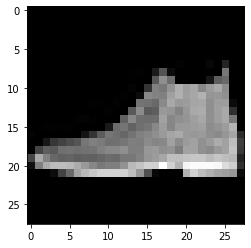

In [12]:
# Plotting Test image
plt.imshow(image_plt, cmap='gray')

In [13]:
# Target
tf.print("Target:",np.argmax(image[1]))
# Predicted Output
print("Prediction:",np.argmax(lenet.predict(image[0])))

Target: 9
Prediction: 9


#### Classes

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [11]:
tf.keras.utils.plot_model(
    lenet,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [8]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.
